## Integrantes:
1. Camila Coltriani
2. Luis Dartayet
3. Irania Fuentes
4. Jonathan Fichelson
5. Ornella Cevoli
# Trabajo práctico  3: Modelos de clasificación 

Introducción: 

El dataset a usar proviene de una empresa de retail en línea cuyo modelo de negocio se sustenta sobre una plataforma que opera únicamente de manera digital. 

El objetivo de este trabajo es identificar clientes que puedan estar propensos a dejar de utilizar la plataforma en el corto plazo.  

In [1]:
#Las librerías utilizadas en este documento son:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import binarize

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# Booleano para mostrar o no los gráficos del análisis exploratorio de datos
show_EDA_plots = True

## Carga de datos

In [3]:
data  = pd.read_csv('./data/Datos ML 2021 Q2.csv', sep=';')
print("El dataset tiene {} filas y {} columnas".format(data.shape[0], data.shape[1]))
data.head()

El dataset tiene 5099 filas y 20 columnas


CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
0       50001      1             4.0    Mobile Phone         3   
1       50002      1             NaN          Tablet         1   
2       50003      1             NaN          Tablet         1   
3       50004      1             0.0          Tablet         3   
4       50005      1             0.0          Tablet         1   

   WarehouseToHome MainPaymentMode  Gender  HourSpendOnApp  DeviceRegistered  \
0              6.0      Debit Card  Female             3.0                 3   
1              8.0             UPI    Male             3.0                 4   
2             30.0      Debit Card    Male             2.0                 4   
3             15.0      Debit Card    Male             2.0                 4   
4             12.0              CC    Male             NaN                 3   

         PrefCategory  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory  Somewhat satified        Single                9   
1              Mobile          Satisfied        Single                7   
2              Mobile          Satisfied        Single                6   
3  Laptop & Accessory   Excelent service        Single                8   
4              Mobile   Excelent service        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

## Descripción del dataset

#### El dataset tiene las siguientes columnas:

- CustomerID: ID del cliente
- Churn: Columna que indica si el cliente dejó de usar la plataforma o no. 1 es que se da de baja.
- CustomerTenure: Es el tiempo transcurrido desde el inicio de la relación con el cliente (en meses)
- MainDeviceLogin: Dispositivo principal que utiliza el cliente para acceder a la plataforma
- CityTier: Indicador del nivel de desarrollo de la ciudad donde vive el cliente
- WarehouseToHome: Distancia desde el centro de distribución a la vivienda del cliente (en km)
- MainPaymentMode: Método de pago más utilizado por el cliente
- Gender: Género del cliente
- HourSpendOnApp: Número de horas que el cliente ha pasado en la plataforma
- DeviceRegistered: Número de dispositivos en los que el cliente ha accedido a la plataforma
- PrefCategory: Categoría más común de las compras del cliente en el último mes
- SatisfactionScore: Nivel de satisfacción del cliente con el servicio
- MaritalStatus: Estado civil del cliente
- NumberOfAddress: Número de direcciones diferentes registradas por el cliente
- Complain: Si ha realizado reclamos
- OrderAmountHikeFromlastYear: Incremento porcentual en la cantidad de compras con respecto al año anterior
- CouponUsed: Número de cupones usados en el último mes
- OrderCount: Número de compras realizadas en el último mes
- DaySinceLastOrder: Cantidad de días desde la última compra
- CashbackAmount: Promedio de reembolsos pedidos en el último mes

Variable objetivo: Churn (termino empleado en marketing para hacer referencia a si un cliente deja de usar una aplicación y/o regresa)

## Exploración de datos

In [4]:
# Cantidad de datos y chequeo de datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5099 non-null   int64  
 1   Churn                        5099 non-null   int64  
 2   CustomerTenure               4835 non-null   float64
 3   MainDeviceLogin              5099 non-null   object 
 4   CityTier                     5099 non-null   int64  
 5   WarehouseToHome              4848 non-null   float64
 6   MainPaymentMode              5099 non-null   object 
 7   Gender                       5099 non-null   object 
 8   HourSpendOnApp               4844 non-null   float64
 9   DeviceRegistered             5099 non-null   int64  
 10  PrefCategory                 5099 non-null   object 
 11  SatisfactionScore            5099 non-null   object 
 12  MaritalStatus                5099 non-null   object 
 13  NumberOfAddress   

In [5]:
# data.describe()

- Distribucion de la variable objetivo *Churn*

In [6]:
#Distribucion de la variable objetivo
display(data['Churn'].value_counts())
display((data['Churn'].value_counts(normalize=True)*100))

0    4233
1     866
Name: Churn, dtype: int64

0    83.016278
1    16.983722
Name: Churn, dtype: float64

La variable objetivo Churn se distribuye en una clase mayoritaria Churn = 0 (datos = 2802), la cual, corresponde a los clientes que permanecen en la plataforma y una la minoritaria Churn = 1 (datos = 564) que corresponde a los clientes que se dan de baja.

    Observamos que tenemos un dataset desbalanceado con un 83% de datos en la clase 0 y un 16% de datos para la clase 1.

In [7]:
#Presentamos la distribucion de datos unicos por columna
for columnas in data.columns:
    print("")
    print(f'Nombre:{columnas}')
    print(data[columnas].value_counts())


Nombre:CustomerID
50001    1
53397    1
53404    1
53403    1
53402    1
        ..
51700    1
51699    1
51698    1
51697    1
55099    1
Name: CustomerID, Length: 5099, dtype: int64

Nombre:Churn
0    4233
1     866
Name: Churn, dtype: int64

Nombre:CustomerTenure
1.0     580
0.0     508
8.0     231
9.0     223
7.0     203
4.0     187
5.0     184
10.0    184
11.0    182
3.0     174
6.0     166
13.0    160
12.0    159
2.0     153
14.0    150
15.0    145
16.0    133
19.0    125
18.0    112
20.0     98
17.0     95
23.0     78
21.0     72
24.0     70
22.0     69
28.0     64
27.0     63
30.0     61
26.0     57
25.0     55
29.0     47
31.0     44
50.0      1
60.0      1
51.0      1
Name: CustomerTenure, dtype: int64

Nombre:MainDeviceLogin
Mobile Phone    2441
Computer        1480
Tablet          1178
Name: MainDeviceLogin, dtype: int64

Nombre:CityTier
1    3332
3    1557
2     210
Name: CityTier, dtype: int64

Nombre:WarehouseToHome
9.0      481
7.0      389
8.0      370
6.0      295
16

- Detección de datos sospechosas o atípicos

Se consideran columnas con valores sospechosos aquellas cuya máximo valor se encuentran por encima de 3 desviaciones estándar de la media. 

In [8]:
#definimos el limite para considerar un dato sospechoso
std_limit = 3
#Por la naturaleza de las variables, se considera que los valores sospechosos son aquellos que se encuentran por encima y no los inferiores.

In [9]:
# Se crea una funcion para identificar los Columnas con datos sospechosas
suspicious_columns = []

for col in data.columns:
    if(data[col].dtype == 'object'):
        continue
    mean = data[col].mean()
    std = data[col].std()
    max = data[col].max()
    if(max > mean + std_limit*std):
        suspicious_columns.append(data[col].name)
suspicious_columns


['CustomerTenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [10]:
# Se crea una función para identificar las filas con datos sospechosas y se grafican
suspicious_rows_arr = []

def investigate_suspicious_column(data, column, watch_outliers=True):
    if(show_EDA_plots):
        fig, ax = plt.subplots(1,2, figsize=(15,5))
        plt.suptitle(column)
        sns.histplot(data[column], ax=ax[0])
        sns.boxplot(data=data[column], ax=ax[1], orient='h')

        plt.show()

    if(watch_outliers):
        mean = data[column].mean()
        std = data[column].std()
        max = data[column].max()

        suspicious_rows = data[data[column] > mean + std_limit*std]
        suspicious_rows_arr.append(suspicious_rows)
        display("Hay {} filas sospechosas".format(suspicious_rows.shape[0]))
        display(suspicious_rows)

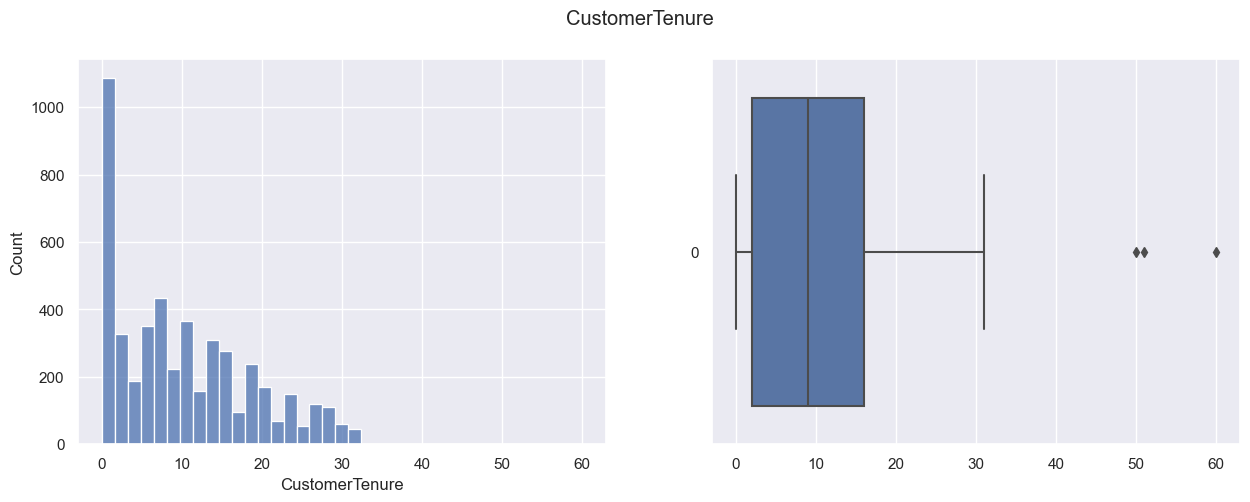

'Hay 3 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
928        50929      0            50.0          Tablet         1   
2719       52720      0            60.0    Mobile Phone         3   
3743       53744      0            51.0    Mobile Phone         1   

      WarehouseToHome MainPaymentMode  Gender  HourSpendOnApp  \
928               6.0      Debit Card    Male             3.0   
2719             27.0      Debit Card  Female             3.0   
3743              7.0      Debit Card    Male             4.0   

      DeviceRegistered        PrefCategory SatisfactionScore MaritalStatus  \
928                  1  Laptop & Accessory         Satisfied      Divorced   
2719                 3             Grocery     Not satisfied       Married   
3743                 2  Laptop & Accessory         Satisfied      Divorced   

      NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
928                 1         0                         24.0         1.0   
2719                5         1                         13.0         NaN   
3743                2         0                         25.0         2.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  
928          2.0                8.0             149  
2719         1.0                0.0             279  
3743         3.0                9.0             174

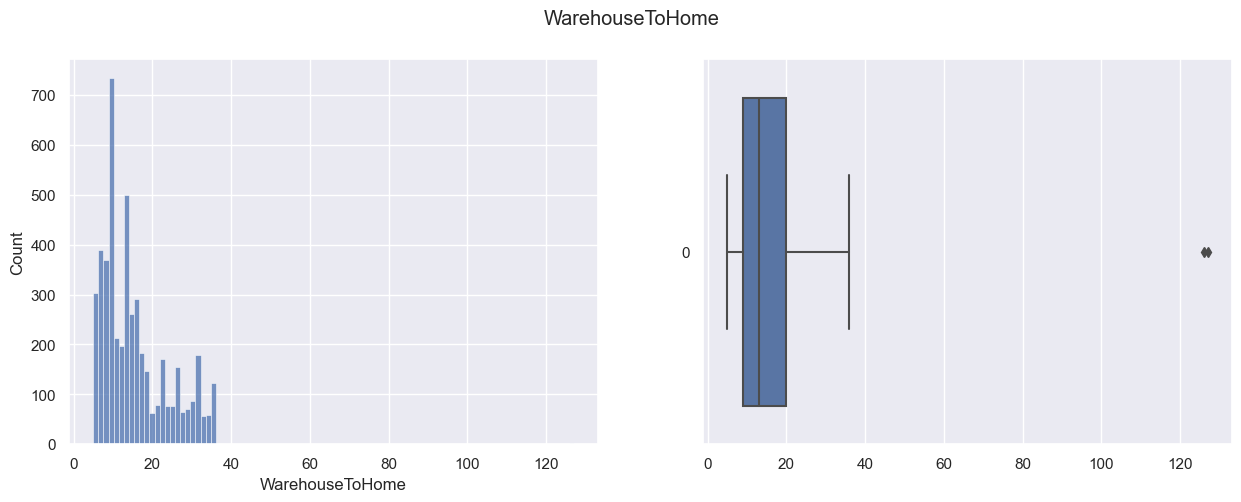

'Hay 2 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
1309       51310      0            25.0        Computer         3   
4124       54125      0            26.0        Computer         3   

      WarehouseToHome MainPaymentMode Gender  HourSpendOnApp  \
1309            126.0      Debit Card   Male             2.0   
4124            127.0      Debit Card   Male             3.0   

      DeviceRegistered  PrefCategory SatisfactionScore MaritalStatus  \
1309                 3        Mobile     Not satisfied       Married   
4124                 4  Mobile Phone     Not satisfied       Married   

      NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
1309                3         0                         15.0         1.0   
4124                4         0                         16.0         2.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  
1309         1.0                0.0             135  
4124         2.0                1.0             160

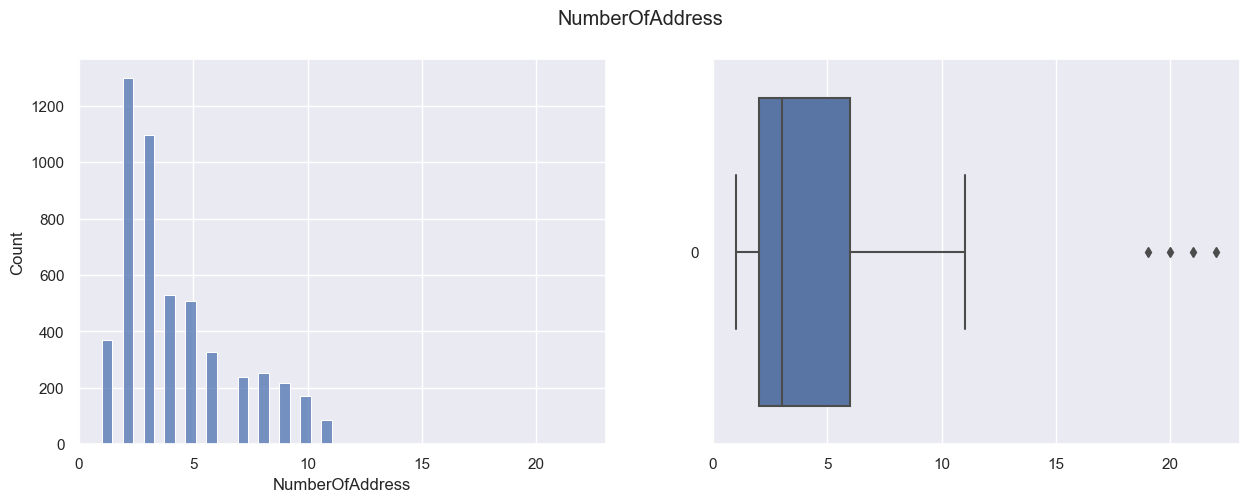

'Hay 4 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
260        50261      1             NaN        Computer         1   
691        50692      0            12.0        Computer         1   
3075       53076      1             1.0        Computer         1   
3506       53507      0            13.0        Computer         1   

      WarehouseToHome MainPaymentMode Gender  HourSpendOnApp  \
260              10.0             COD   Male             2.0   
691              15.0      Debit Card   Male             3.0   
3075             11.0             COD   Male             3.0   
3506             16.0      Debit Card   Male             4.0   

      DeviceRegistered        PrefCategory  SatisfactionScore MaritalStatus  \
260                  3              Mobile  Somewhat satified        Single   
691                  3  Laptop & Accessory     Very satisfied        Single   
3075                 4        Mobile Phone  Somewhat satified        Single   
3506                 4  Laptop & Accessory     Very satisfied        Single   

      NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
260                19         1                         23.0         1.0   
691                21         0                         15.0         1.0   
3075               20         1                         24.0         2.0   
3506               22         0                         16.0         2.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  
260          1.0                0.0             123  
691          1.0                3.0             168  
3075         2.0                1.0             148  
3506         2.0                4.0             193

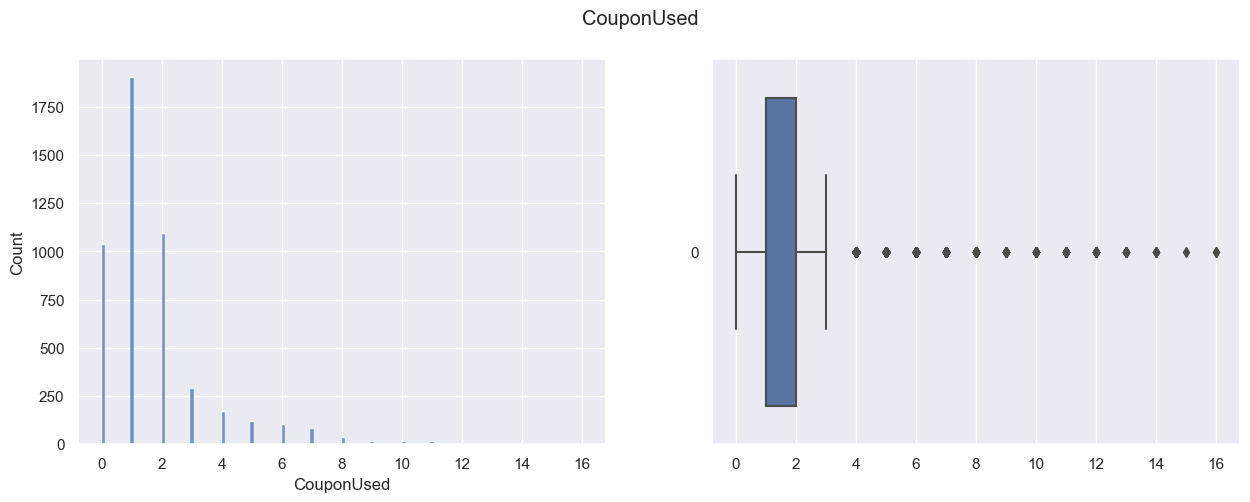

'Hay 94 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
10         50011      1             4.0    Mobile Phone         1   
21         50022      1            20.0    Mobile Phone         1   
93         50094      0            18.0        Computer         3   
126        50127      0            12.0        Computer         1   
201        50202      0            12.0        Computer         1   
...          ...    ...             ...             ...       ...   
4898       54899      0            13.0    Mobile Phone         1   
4973       54974      1             3.0        Computer         1   
5042       55043      0            10.0    Mobile Phone         1   
5086       55087      0            17.0    Mobile Phone         3   
5097       55098      0            13.0    Mobile Phone         1   

      WarehouseToHome   MainPaymentMode  Gender  HourSpendOnApp  \
10               18.0  Cash on Delivery  Female             2.0   
21               29.0       Credit Card  Female             3.0   
93               12.0       Credit Card  Female             2.0   
126               8.0  Cash on Delivery  Female             3.0   
201               5.0       Credit Card    Male             2.0   
...               ...               ...     ...             ...   
4898              7.0        Debit Card  Female             4.0   
4973              9.0        Debit Card    Male             3.0   
5042              8.0  Cash on Delivery  Female             4.0   
5086             11.0          E wallet  Female             3.0   
5097             20.0       Credit Card  Female             4.0   

      DeviceRegistered PrefCategory  SatisfactionScore MaritalStatus  \
10                   3       Others          Satisfied      Divorced   
21                   3      Fashion  Somewhat satified      Divorced   
93                   4      Fashion  Somewhat satified        Single   
126                  3      Fashion          Satisfied        Single   
201                  4       Others  Somewhat satified      Divorced   
...                ...          ...                ...           ...   
4898                 5      Grocery      Not satisfied       Married   
4973                 4      Grocery      Not satisfied       Married   
5042                 6      Fashion   Excelent service       Married   
5086                 5      Fashion      Not satisfied        Single   
5097                 5      Grocery     Very satisfied       Married   

      NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
10                  2         0                          NaN         9.0   
21                  2         0                         12.0        11.0   
93                  7         0                         12.0        12.0   
126                 1         0                         25.0        10.0   
201                 2         0                          NaN         9.0   
...               ...       ...                          ...         ...   
4898                3         0                         17.0        10.0   
4973                9         0                         12.0        11.0   
5042                4         1                         22.0         8.0   
5086                5         0                         15.0        11.0   
5097                8         1                          NaN        11.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  
10          15.0                8.0             295  
21          15.0                6.0             203  
93          12.0                8.0             189  
126         11.0                NaN             209  
201         13.0                3.0             293  
...          ...                ...             ...  
4898         NaN                9.0             252  
4973         NaN                6.0             247  
5042         8.0                NaN             228  
5086        16.0                NaN             227  


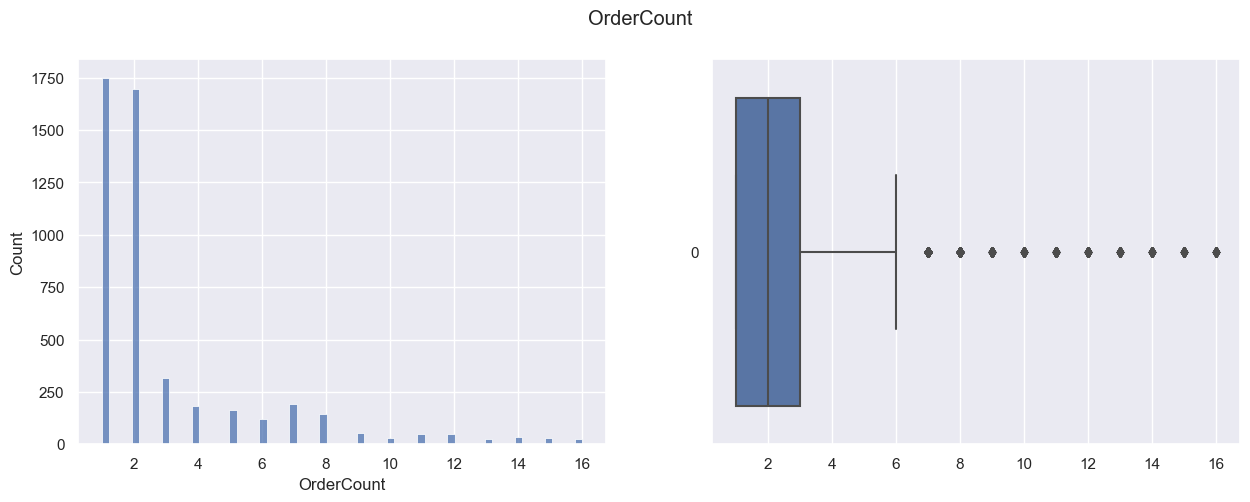

'Hay 161 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
10         50011      1             4.0    Mobile Phone         1   
21         50022      1            20.0    Mobile Phone         1   
53         50054      0            19.0    Mobile Phone         3   
93         50094      0            18.0        Computer         3   
112        50113      0            25.0        Computer         3   
...          ...    ...             ...             ...       ...   
5074       55075      0            29.0        Computer         1   
5078       55079      0            25.0        Computer         3   
5082       55083      0            18.0    Mobile Phone         1   
5086       55087      0            17.0    Mobile Phone         3   
5097       55098      0            13.0    Mobile Phone         1   

      WarehouseToHome   MainPaymentMode  Gender  HourSpendOnApp  \
10               18.0  Cash on Delivery  Female             2.0   
21               29.0       Credit Card  Female             3.0   
53                6.0          E wallet  Female             3.0   
93               12.0       Credit Card  Female             2.0   
112               8.0        Debit Card    Male             3.0   
...               ...               ...     ...             ...   
5074             15.0       Credit Card    Male             3.0   
5078             16.0        Debit Card    Male             3.0   
5082             11.0        Debit Card    Male             4.0   
5086             11.0          E wallet  Female             3.0   
5097             20.0       Credit Card  Female             4.0   

      DeviceRegistered PrefCategory  SatisfactionScore MaritalStatus  \
10                   3       Others          Satisfied      Divorced   
21                   3      Fashion  Somewhat satified      Divorced   
53                   3      Fashion   Excelent service       Married   
93                   4      Fashion  Somewhat satified        Single   
112                  4       Others          Satisfied        Single   
...                ...          ...                ...           ...   
5074                 5      Grocery     Very satisfied       Married   
5078                 4       Others     Very satisfied       Married   
5082                 2       Others   Excelent service       Married   
5086                 5      Fashion      Not satisfied        Single   
5097                 5      Grocery     Very satisfied       Married   

      NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
10                  2         0                          NaN         9.0   
21                  2         0                         12.0        11.0   
53                  2         0                         25.0         4.0   
93                  7         0                         12.0        12.0   
112                 2         1                         18.0         NaN   
...               ...       ...                          ...         ...   
5074                3         1                         16.0         3.0   
5078                6         1                         25.0         7.0   
5082                3         0                          NaN         3.0   
5086                5         0                         15.0        11.0   
5097                8         1                          NaN        11.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  
10          15.0                8.0             295  
21          15.0                6.0             203  
53          15.0                7.0             205  
93          12.0                8.0             189  
112         15.0               12.0             291  
...          ...                ...             ...  
5074        16.0                1.0             261  
5078        12.0               11.0             323  
5082        15.0               14.0             317  
5086        16.0                NaN             227  


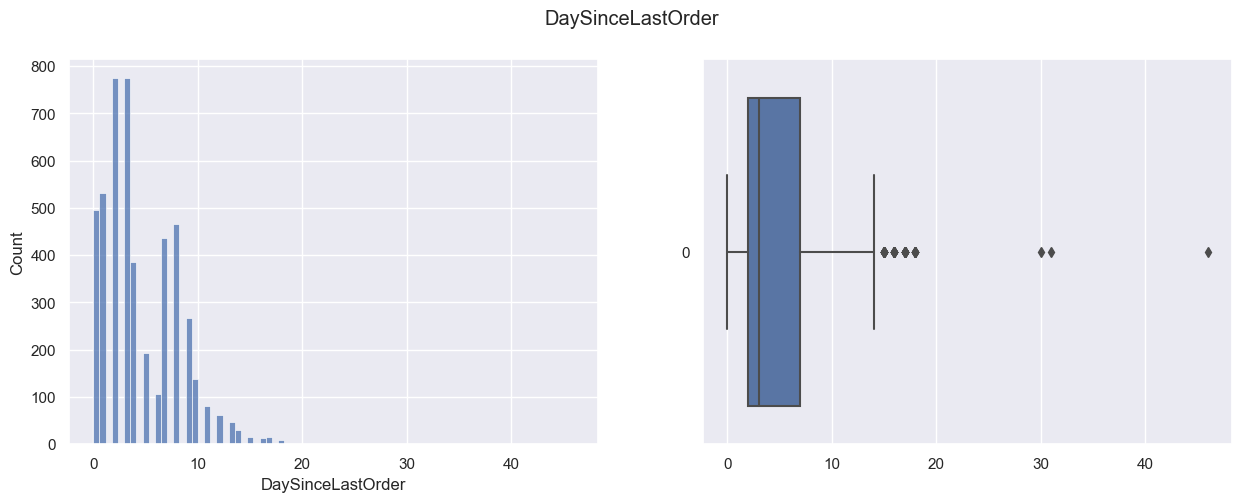

'Hay 41 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
261        50262      0            10.0          Tablet         1   
436        50437      0            25.0    Mobile Phone         3   
491        50492      0            24.0    Mobile Phone         3   
561        50562      0            14.0          Tablet         1   
750        50751      0            17.0          Tablet         1   
801        50802      0            16.0    Mobile Phone         3   
953        50954      0            17.0    Mobile Phone         1   
1223       51224      0            13.0    Mobile Phone         1   
1373       51374      0            17.0    Mobile Phone         1   
1490       51491      0             3.0          Tablet         1   
1731       51732      0            10.0          Tablet         1   
1906       51907      0            25.0    Mobile Phone         3   
1961       51962      0            24.0    Mobile Phone         3   
2031       52032      0            14.0          Tablet         1   
2040       52041      1             0.0    Mobile Phone         3   
2220       52221      0            17.0          Tablet         1   
2271       52272      0            16.0    Mobile Phone         3   
2423       52424      0            17.0    Mobile Phone         1   
2693       52694      0            13.0    Mobile Phone         1   
2843       52844      0            19.0          Tablet         1   
2877       52878      0            29.0    Mobile Phone         1   
2921       52922      0            16.0    Mobile Phone         1   
3076       53077      0            11.0    Mobile Phone         1   
3251       53252      0            26.0    Mobile Phone         3   
3306       53307      0            25.0    Mobile Phone         3   
3325       53326      0             9.0    Mobile Phone         1   
3376       53377      0            15.0    Mobile Phone         1   
3565       53566      0            18.0    Mobile Phone         1   
3768       53769      0            18.0    Mobile Phone         1   
4038       54039      0            14.0    Mobile Phone         1   
4283       54284      0            25.0    Mobile Phone         1   
4305       54306      0             4.0    Mobile Phone         1   
4313       54314      0            19.0          Tablet         1   
4347       54348      0            29.0    Mobile Phone         1   
4391       54392      0            16.0    Mobile Phone         1   
4546       54547      0            11.0    Mobile Phone         1   
4721       54722      0            26.0    Mobile Phone         3   
4776       54777      0            25.0    Mobile Phone         3   
4795       54796      0             9.0    Mobile Phone         1   
4846       54847      0            15.0    Mobile Phone         1   
5035       55036      0            18.0    Mobile Phone         1   

      WarehouseToHome   MainPaymentMode  Gender  HourSpendOnApp  \
261              20.0        Debit Card  Female             NaN   
436               9.0          E wallet    Male             2.0   
491              32.0          E wallet  Female             3.0   
561              12.0       Credit Card    Male             2.0   
750              35.0               UPI    Male             2.0   
801              10.0          E wallet  Female             2.0   
953              34.0        Debit Card    Male             2.0   
1223              6.0        Debit Card    Male             3.0   
1373             13.0       Credit Card  Female             2.0   
1490             11.0               COD  Female             2.0   
1731             20.0        Debit Card  Female             NaN   
1906              9.0          E wallet    Male             2.0   
1961             32.0          E wallet  Female             3.0   
2031             12.0       Credit Card    Male             2.0   
2040              6.0        Debit Card    Male             2.0   
2220             35.0              

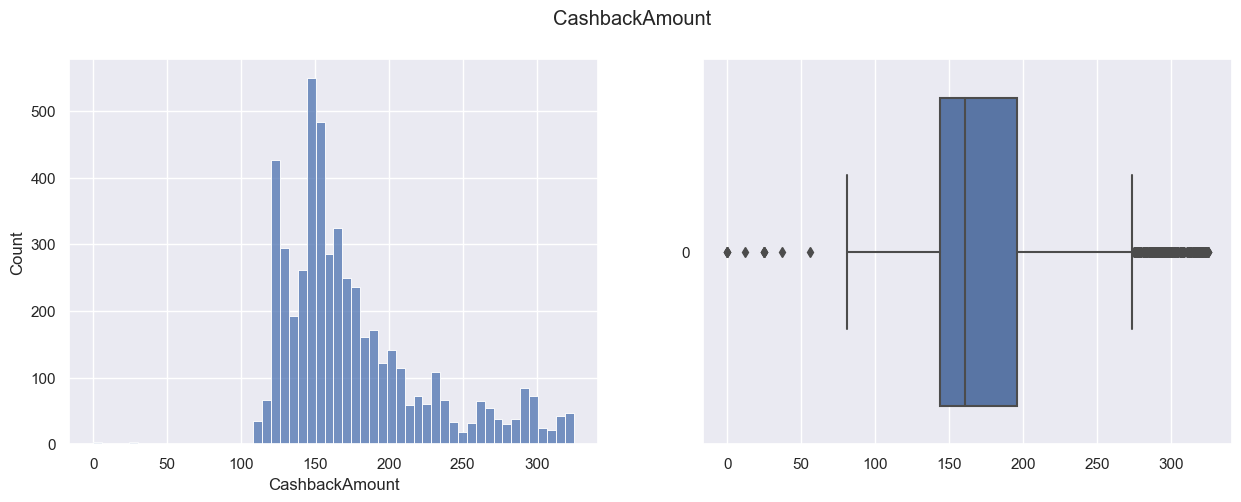

'Hay 4 filas sospechosas'

CustomerID  Churn  CustomerTenure MainDeviceLogin  CityTier  \
2880       52881      0            26.0    Mobile Phone         1   
3436       53437      0            15.0        Computer         1   
4350       54351      0            26.0    Mobile Phone         1   
4906       54907      0            15.0        Computer         1   

      WarehouseToHome MainPaymentMode  Gender  HourSpendOnApp  \
2880              7.0      Debit Card    Male             4.0   
3436             14.0      Debit Card  Female             3.0   
4350              7.0      Debit Card    Male             4.0   
4906             14.0      Debit Card  Female             3.0   

      DeviceRegistered PrefCategory SatisfactionScore MaritalStatus  \
2880                 5       Others         Satisfied      Divorced   
3436                 6       Others         Satisfied       Married   
4350                 5       Others         Satisfied       Married   
4906                 6       Others         Satisfied       Married   

      NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
2880                2         0                         15.0         2.0   
3436                3         0                         23.0         2.0   
4350                2         0                         15.0         8.0   
4906                3         0                         23.0         6.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  
2880        12.0               10.0             325  
3436         6.0               11.0             325  
4350        12.0               10.0             325  
4906         6.0               11.0             325

In [11]:
for col in suspicious_columns:
    investigate_suspicious_column(data, col)

In [12]:
## Total de filas sospechosas
print("Hay {} filas sospechosas".format(sum([suspicious_rows.shape[0] for suspicious_rows in suspicious_rows_arr])))

Hay 309 filas sospechosas


In [13]:
## Filas sospechosas agrupadas por columna churn
suspicious_rows = pd.concat(suspicious_rows_arr)
display(suspicious_rows['Churn'].value_counts())
display(suspicious_rows['Churn'].value_counts(normalize=True))


0    266
1     43
Name: Churn, dtype: int64

0    0.860841
1    0.139159
Name: Churn, dtype: float64

Observamos que la distribución de la variable *Churn* entre los valores extremos es similar, por lo que no parece haber una relación entre las filas con estos datos y la variable objetivo.

Por otro lado, haciendo una observación pormenorizada, creemos que en los casos de las columnas `CouponUsed`, `OrderCount` y `DaySinceLastOrder`  y `CashbackAmount` parecen ser valores lógicos, aún tratándose de valores extremos por lo que no las eliminaremos del dataset original.

Presentamos las columnas que fueron consideradas como sospechosas y las eliminamos de lista: ya no son más columnas sospechosas

In [14]:
print(suspicious_columns)
suspicious_columns.remove('CouponUsed')
suspicious_columns.remove('OrderCount')
suspicious_columns.remove('DaySinceLastOrder')
suspicious_columns.remove('CashbackAmount')

suspicious_columns

['CustomerTenure', 'WarehouseToHome', 'NumberOfAddress', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


['CustomerTenure', 'WarehouseToHome', 'NumberOfAddress']

Eliminamos los datos atípicos de las columnas que quedaron como sospechosas:

CustomerTenure, WarehouseToHome, NumberOfAddress

In [15]:
def remove_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    max = data[column].max()
    return data[data[column] <= mean + std_limit*std]

In [16]:
for col in suspicious_columns:
    data = remove_outliers(data, col)

Veamos el resultado graficamente

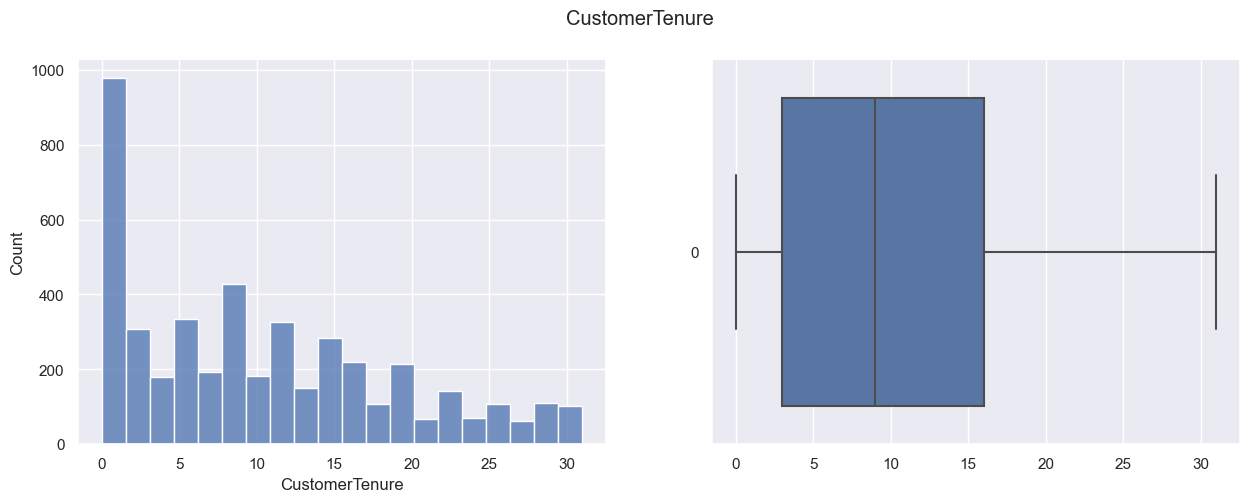

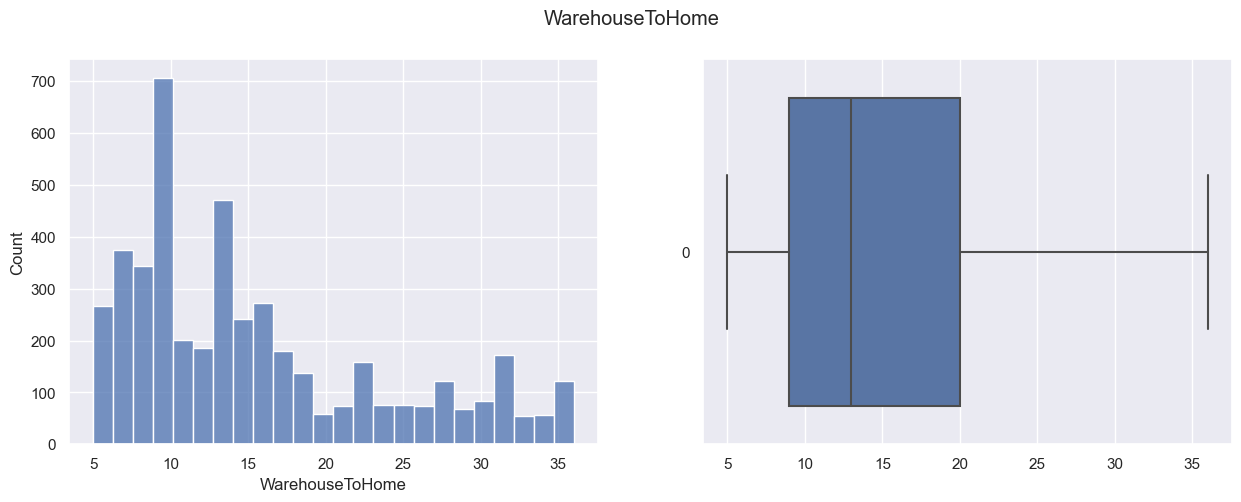

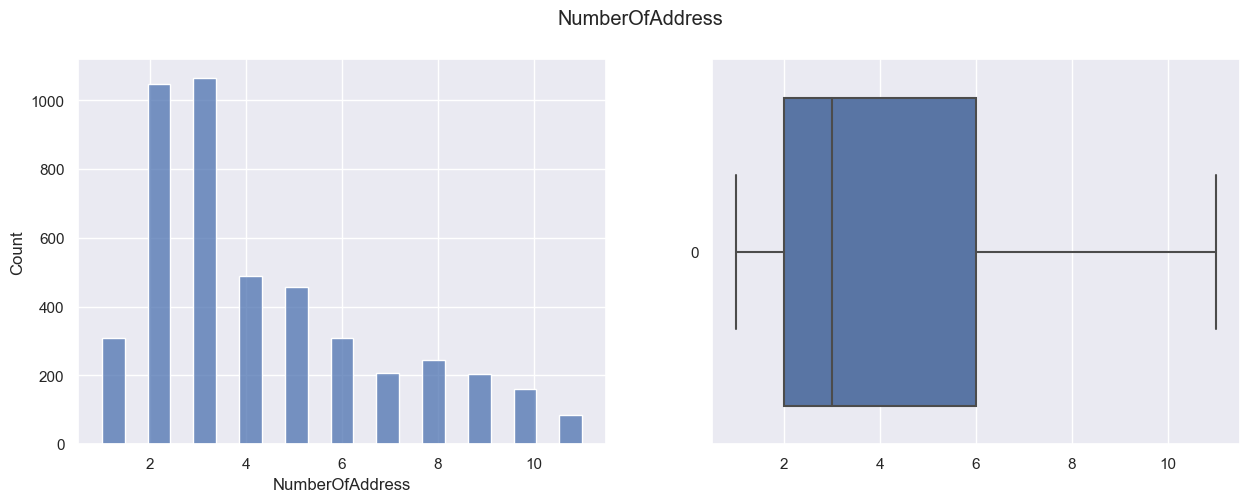

In [17]:
for col in suspicious_columns:
    investigate_suspicious_column(data, col, False)

### Correlación entre las variables

In [18]:
#Presentamos los nombres de las 20 columnas
data.columns

Index(['CustomerID', 'Churn', 'CustomerTenure', 'MainDeviceLogin', 'CityTier',
       'WarehouseToHome', 'MainPaymentMode', 'Gender', 'HourSpendOnApp',
       'DeviceRegistered', 'PrefCategory', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

- Podemos inferir que las variables que tendrán una significancia en predecir el valor del churn son aquellas en las cuales se puedan observar diferencias en la distribución de las clase de *Churn*: Clase 0 y clase 1.

    Graficamos las variables contra los valores 0 y 1 de *Churn* para verificar esta hipotesis

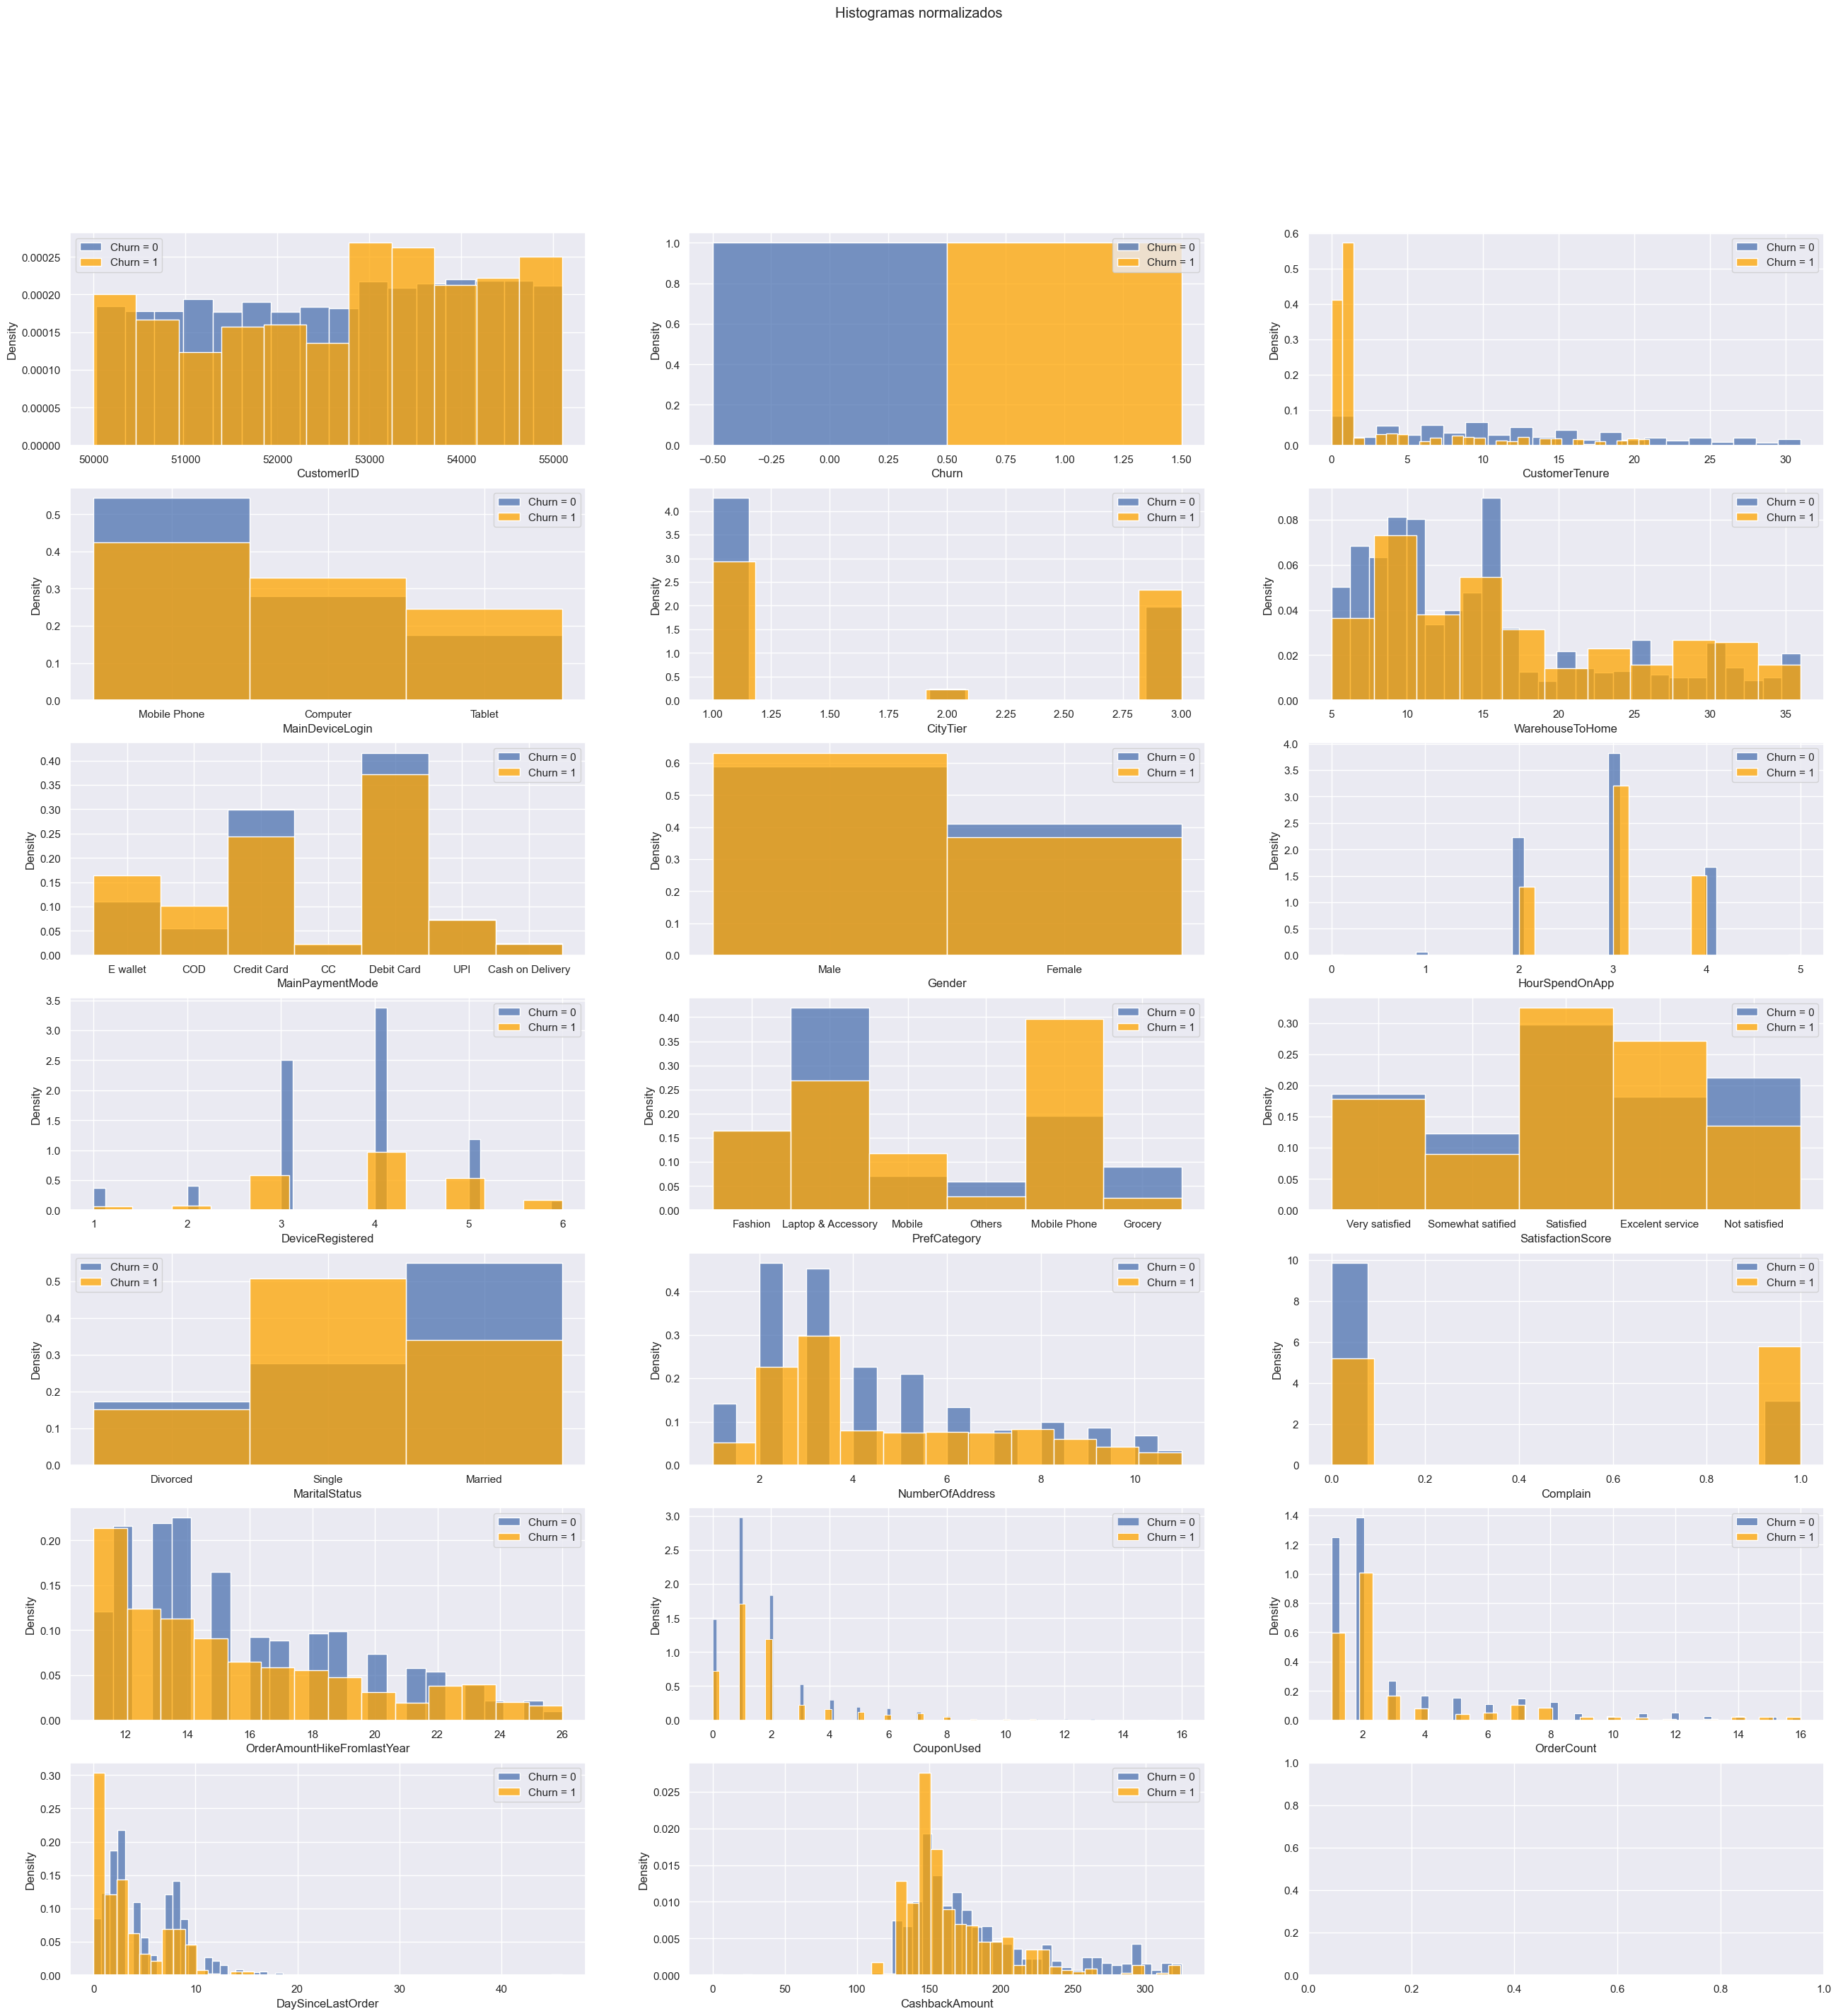

In [19]:
if(show_EDA_plots):
    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(32,32))
    fig.suptitle('Histogramas normalizados')
    for c, ax in zip(data.columns, axes.flatten()):
        sns.histplot(data = data.loc[data['Churn']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
        sns.histplot(data = data.loc[data['Churn']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
        ax.legend(['Churn = 0', 'Churn = 1'])

De los histogramas podemos observar que: *CustomerID*, *Gender* son variables que no permiten diferenciar si el cliente se queda en la plataforma (clase 0) o la abandona (clase 1).

Puede observarse que *CouponUsed* muestra una tendencia a predecir si los datos pertenecen a la clase 0 o clase 1 a medida que aumenta el numero de cupones usados. *OrderCount* por su parte no muestra esta tendencia clara cuando aumenta el numero de compras.

Descartarmos las columnas que no permiten diferenciar las clases en *Churn*

In [20]:
## Eliminamos las columnas que no permiten diferenciar las clases
columns_to_eliminate = ['CustomerID', 'Gender']

data = data.drop(columns_to_eliminate, axis=1)

- Ahora queremos identificar si las variables presentan correlacion entre ellas y con la variable objetivo

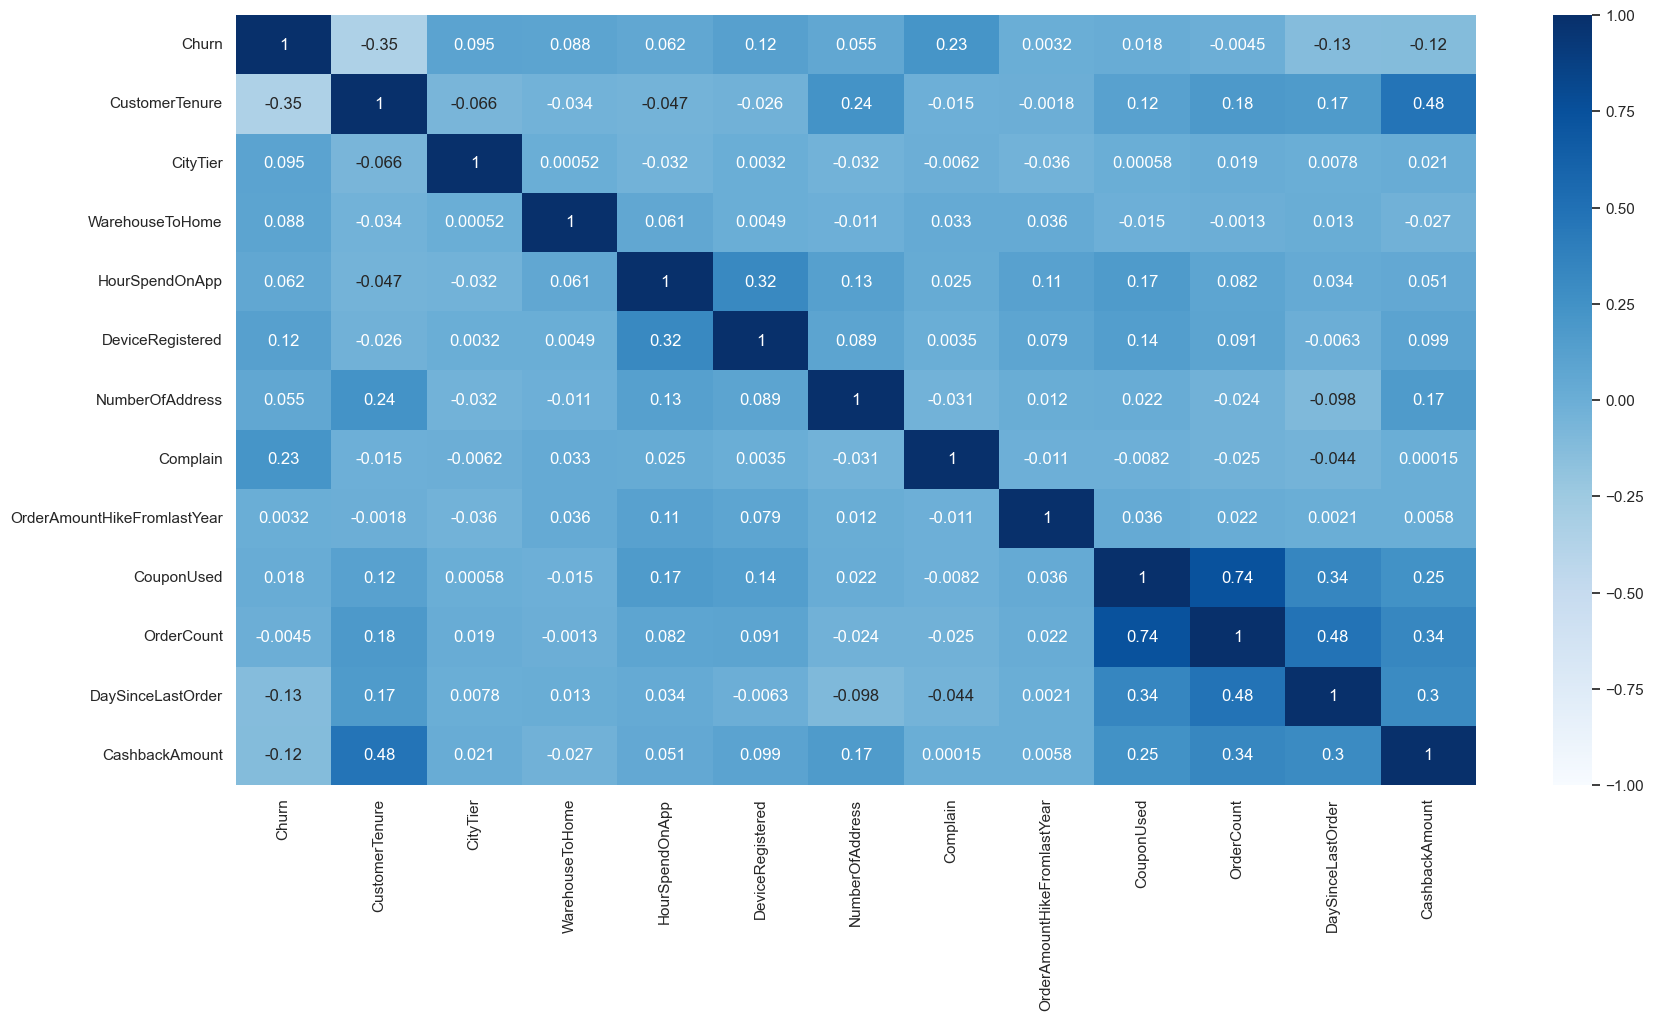

In [21]:
# Vemos que variables están correlacionadas con Churn
if(show_EDA_plots):
    plt.figure(figsize=(20,10))
    sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='Blues')

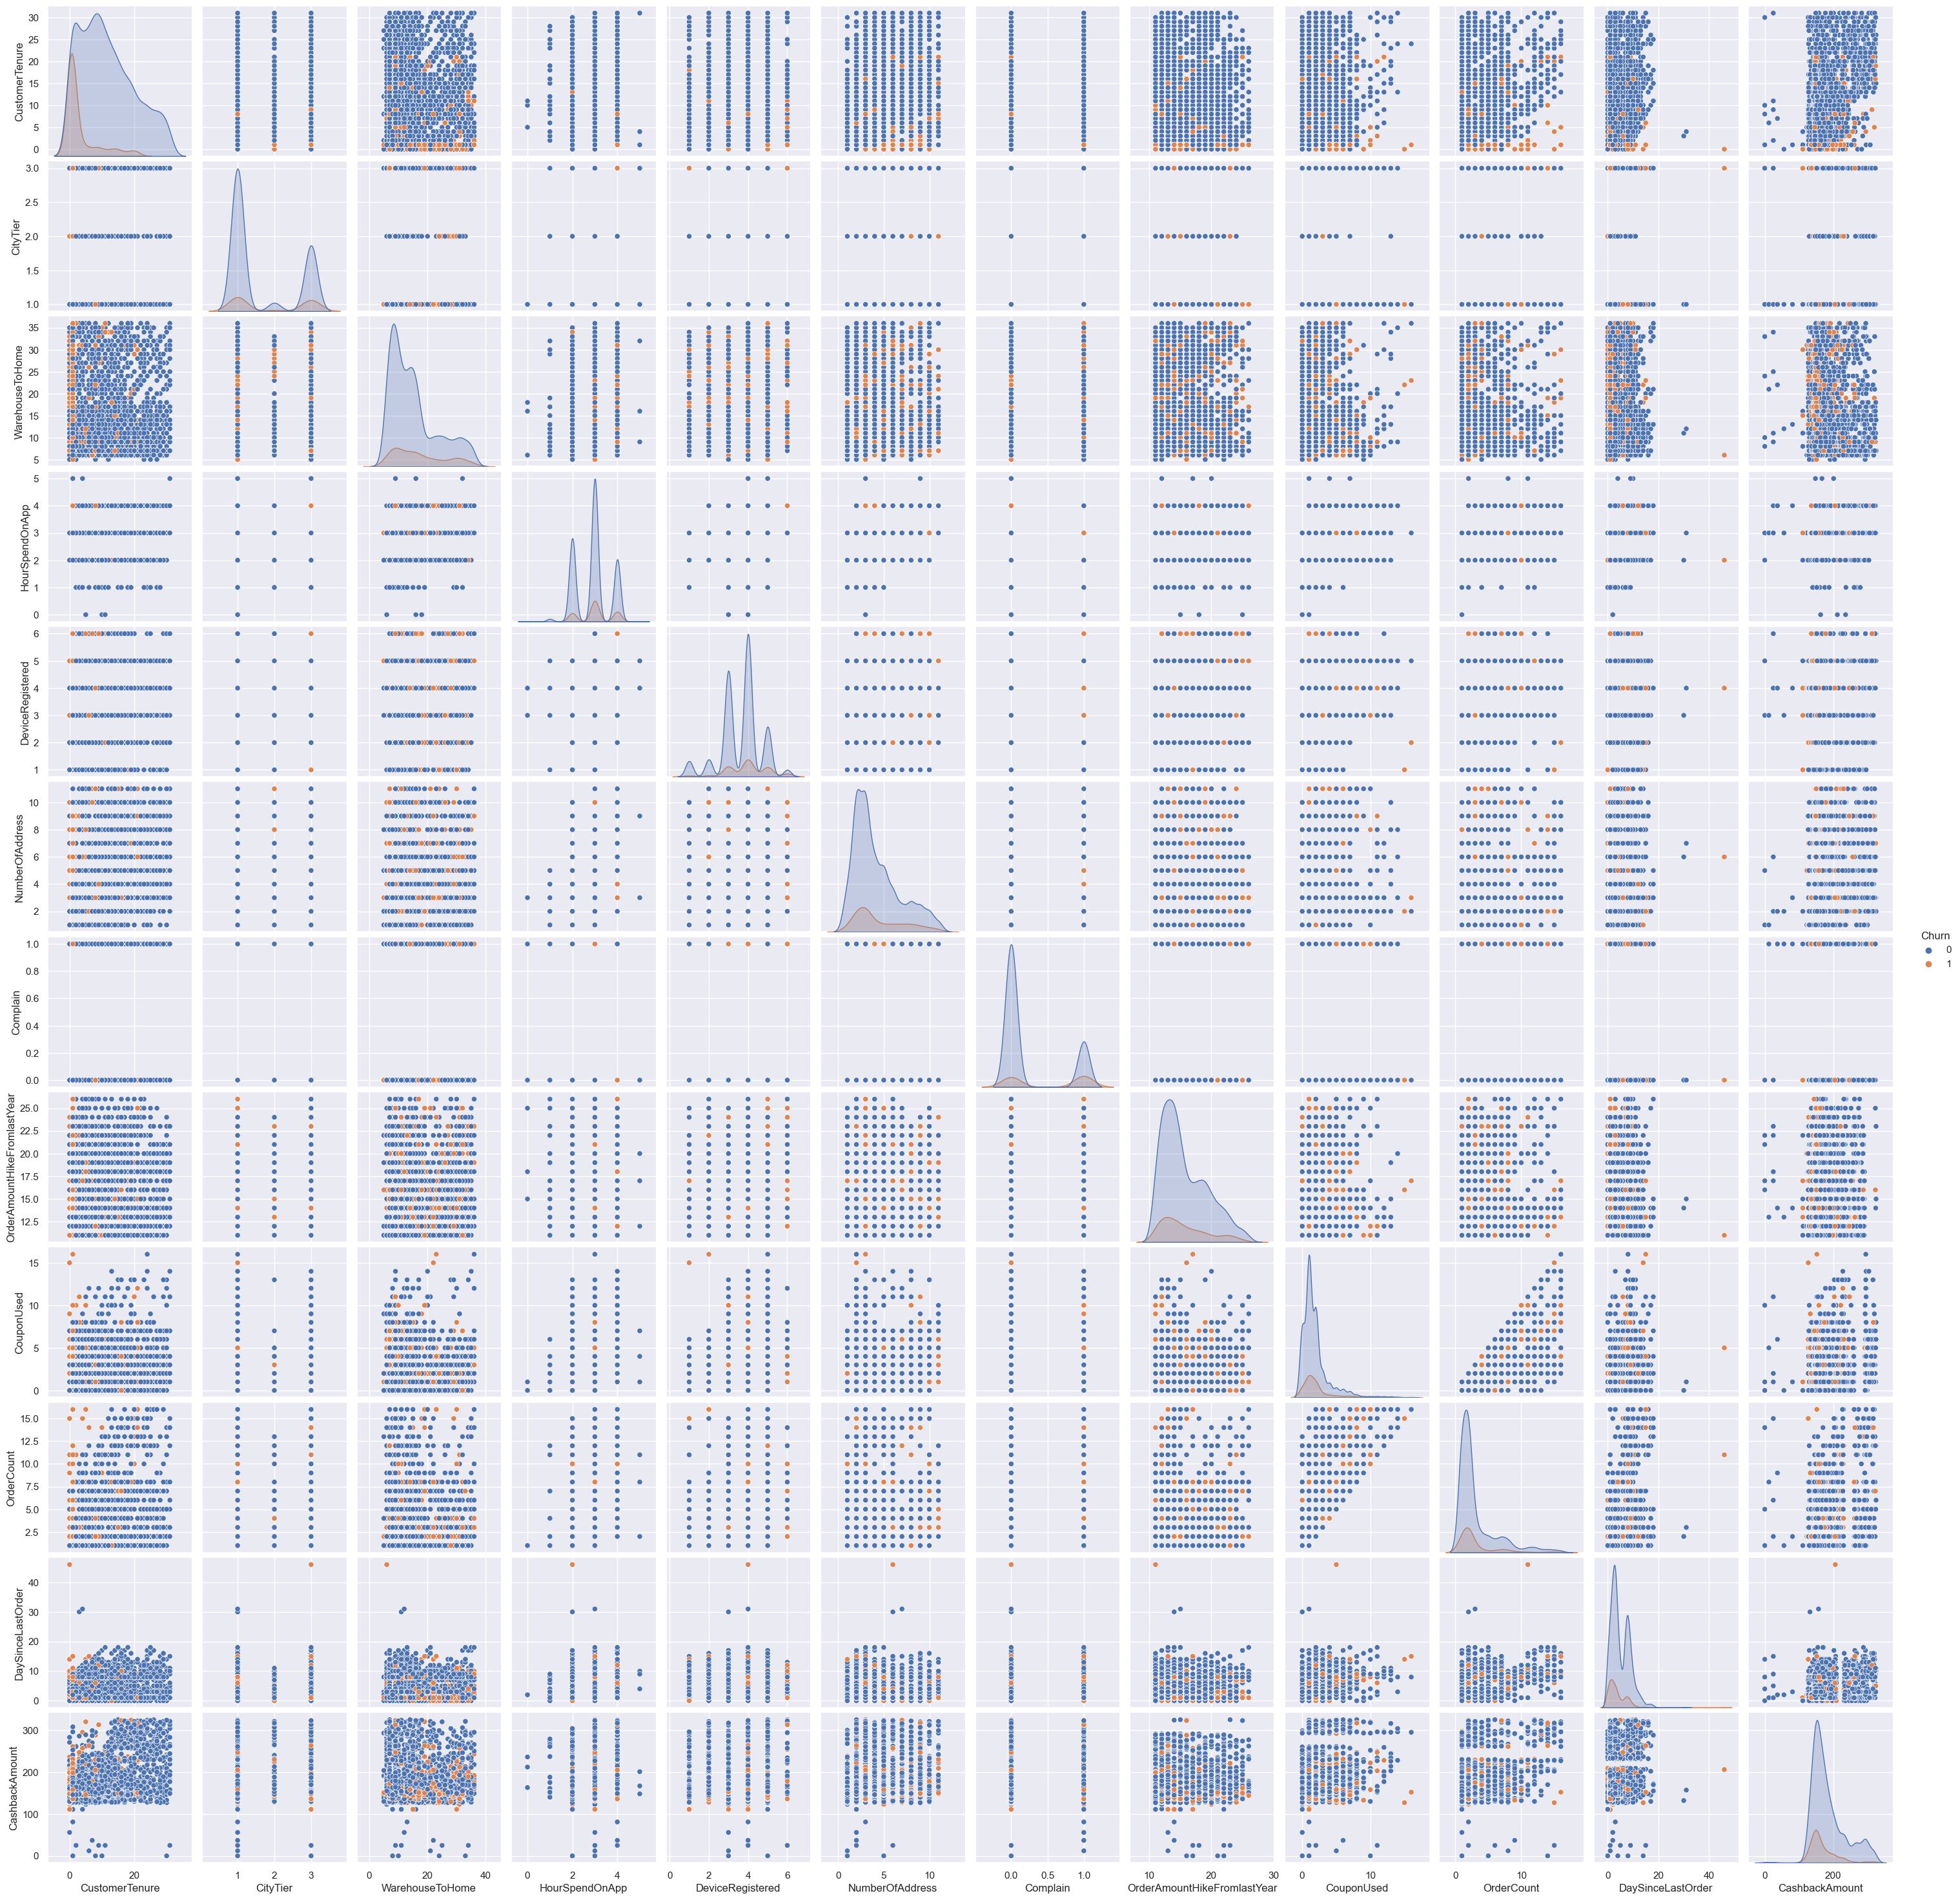

In [22]:
if(show_EDA_plots):
    sns.pairplot(data, hue='Churn')

Interpretación de la mapa de la correlación gráfica y numérica:

Las variables que muestran correlación (mapa de calor) con la variable objetivo **Churn** son:

- *CustomerTenure* (-0.34), presenta una relación media-baja, sin embargo, nos indica que es negativa. Es decir, a medida que pasa el tiempo los clientes pueden permanecer en la plataforma o no sin darse de baja. 

- *Complain* (0.24), presenta relación media-baja, gráficamente nos muestra que los clientes que han realizado más reclamos se han quedado en comparación con los que han dejado la plataforma.

Variables relacionadas entre ellas:

- *OrderCount y CouponUsed* = 0.73, presentan una alta correlación, ya que, es lógico que al usar más cupones de compra el numero de ordenes se vea incrementado. 

- *DaySinceLastOrder* y *OrderCount* = 0.45, presentan una buena correlación, al pasar los días desde la ultima compra es lógico que las ordenes incrementen. 

- *DaySinceLastOrder* y *CouponUsed* = 0.32, es la misma relación que con OrderCount

- *CustomerTenure* vs *cashbackAmount* =  0.22, presentan una baja relación, es lógico pensar que si los clientes se quedan más tiempo en la plataforma puede estar asociado a solicitudes de reembolso.

De esta interpretacion, se puede decidir eliminar como columna predictora *OrderCount* y *DaySinceLastOrder* por estar correlacionas altamente con *CouponUsed*. 

Se decide dejar *CoupondUsed* ya que graficamente (histogramas) se observa que puede diferenciar entre la clase cero y clase 1, mucho mejor que OrderCount.

La relación de *CoupondUsed* con "Churn es mayor que *orderCount*

In [23]:
## Variables a eliminar
columns_to_eliminate_2 = ['OrderCount', "DaySinceLastOrder"]

data = data.drop(columns_to_eliminate_2, axis=1)

Supuesto 1: 
Estadisticamente se considera que una correlacion es despreciable si: r < |0.1|

#Vemos la relación y eliminamos las variables cuya correlación sea menor a 0.1.

In [24]:
# ## Correlación entre variables y churn
abs_corr = data.corr()[['Churn']].abs().sort_values(by='Churn', ascending=False)

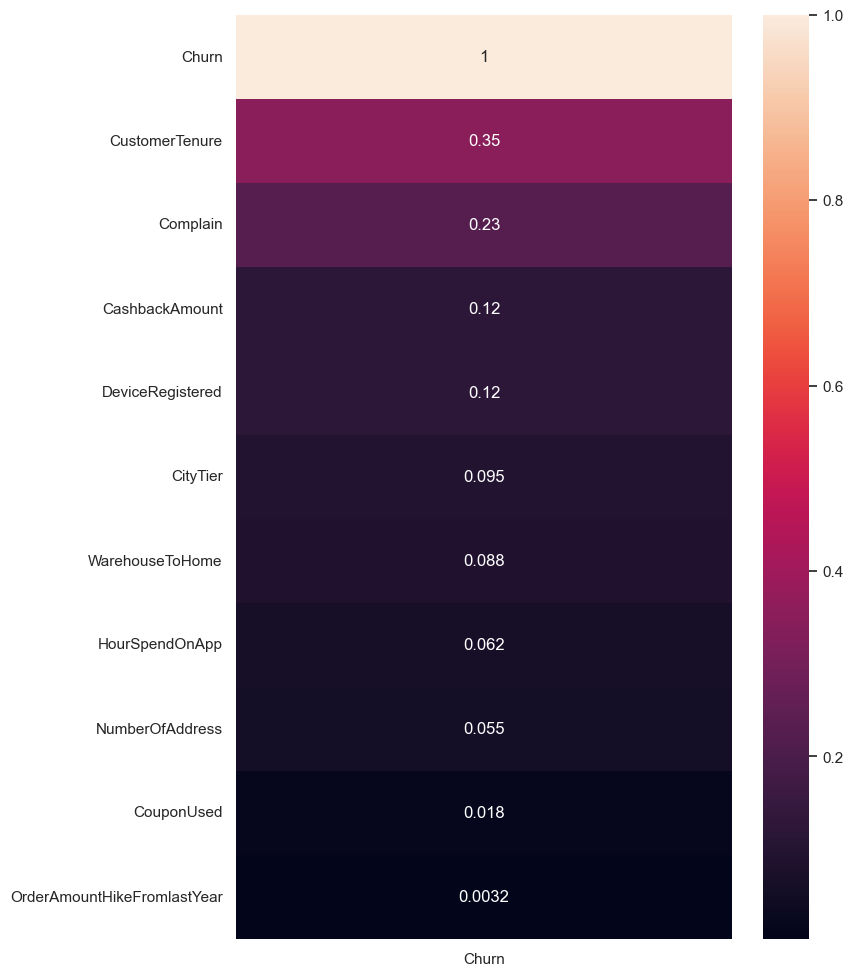

In [25]:
## Correlación entre variables y churn, absoluta (para ordenar sin tener en cuenta si es positiva o negativa)
if(show_EDA_plots):
    plt.figure(figsize=(8,12))
    sns.heatmap(abs_corr, annot=True)

Nos quedamos con las variables que tienen una correlación mayor a 0.1

In [26]:
## Variables con correlación mayor a 
high_corr_vars = abs_corr[abs_corr['Churn'] >= 0.1]
## Lo convertimos en una lista para poder iterar sobre ella
high_corr_vars = high_corr_vars.index.tolist()
high_corr_vars

['Churn', 'CustomerTenure', 'Complain', 'CashbackAmount', 'DeviceRegistered']

In [27]:
## Modificamos nuestro dataset con las columnas de la lista que tienen correlación mayor a 0.1
data = data[high_corr_vars]

- Eliminacion de datos NAN

In [28]:
## Eliminación de valores nan
# Veamos cuantos valores nulos hay en cada columna
data.isna().sum()


Churn               0
CustomerTenure      0
Complain            0
CashbackAmount      0
DeviceRegistered    0
dtype: int64

In [29]:
# los eliminamos
# después de eliminar las columnas sospechosas no quedan valores nulos 

data.dropna(inplace=True)

display(data.isna().sum())

print("El dataset limpio tiene {} filas y {} columnas".format(data.shape[0], data.shape[1]))

Churn               0
CustomerTenure      0
Complain            0
CashbackAmount      0
DeviceRegistered    0
dtype: int64

El dataset limpio tiene 4576 filas y 5 columnas


## Separación de datos

In [30]:
#Asignamos las variables X e Y a modelar
X = data.drop(['Churn'], axis=1) # ['CustomerTenure', 'Complain', 'CashbackAmount', 'DeviceRegistered']
y = data['Churn'] #['Churn']

In [31]:
#Dividimos en train-test
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3660, 4)
(916, 4)
(3660,)
(916,)


In [32]:
## Probamos con oversampling o undersampling para balancear las clases 

# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

resample = True

random_balancer = RandomOverSampler(sampling_strategy='minority')
#random_balancer = RandomUnderSampler(sampling_strategy='majority')
#random_balancer = RandomOverSampler(sampling_strategy=0.5)


X_train, y_train = random_balancer.fit_resample(X_train, y_train) if resample else (X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(6200, 4)
(6200,)


In [33]:
# Verificamos la proporción de churn en los conjuntos de entrenamiento y testeo

print("Churn en el conjunto de entrenamiento")
display(y_train.value_counts(normalize=True))
print("Churn en el conjunto de testeo")
display(y_test.value_counts(normalize=True))


Churn en el conjunto de entrenamiento


0    0.5
1    0.5
Name: Churn, dtype: float64

Churn en el conjunto de testeo


0    0.847162
1    0.152838
Name: Churn, dtype: float64

## Preparación de datos

Identificamos las columnas categoricas

In [34]:
categorical_columns = [col for col in data.columns if data[col].dtypes == 'object']

categorical_columns

[]

Identificamos las columnas numericas

In [35]:
numerical_columns = [col for col in data.columns if data[col].dtypes != 'object']

numerical_columns

['Churn', 'CustomerTenure', 'Complain', 'CashbackAmount', 'DeviceRegistered']

In [36]:
# DeviceRegistered es una variable categórica 

numerical_columns.remove('DeviceRegistered')
categorical_columns.append('DeviceRegistered')

# La transformamos a categórica

X_train['DeviceRegistered'] = X_train['DeviceRegistered'].astype('object')
X_test['DeviceRegistered'] = X_test['DeviceRegistered'].astype('object')


In [37]:
# Complain es una variable categórica binaria: ha realizado reclamos, no ha realizado reclamos

numerical_columns.remove('Complain')
categorical_columns.append('Complain')

# La transformamos a categórica

X_train['Complain'] = X_train['Complain'].astype('object')
X_test['Complain'] = X_test['Complain'].astype('object')

In [38]:
display('categorical_columns',categorical_columns)
display('numerical_columns',numerical_columns)

'categorical_columns'

['DeviceRegistered', 'Complain']

'numerical_columns'

['Churn', 'CustomerTenure', 'CashbackAmount']

### Variables categóricas: 
Realizamos un OneHotEncoder para convertirlas en numericas

In [39]:
encoder_categories = []

X_categorical_columns = [x for x in categorical_columns]

for col in X_categorical_columns:    
    col_categories = data[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array([3, 4, 5, 2, 1, 6], dtype=int64), array([1, 0], dtype=int64)]

In [40]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False, drop='first')

encoder = encoder.fit(X_train[X_categorical_columns])

X_train_encoded = encoder.transform(X_train[X_categorical_columns])
X_train_categorical = pd.DataFrame(X_train_encoded, columns = encoder.get_feature_names_out(X_categorical_columns))

X_test_encoded = encoder.transform(X_test[X_categorical_columns])
X_test_categorical = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names_out(X_categorical_columns))
X_test_categorical.head()

DeviceRegistered_4  DeviceRegistered_5  DeviceRegistered_2  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 1.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DeviceRegistered_1  DeviceRegistered_6  Complain_0  
0                 0.0                 0.0         0.0  
1                 0.0                 0.0         1.0  
2                 0.0                 0.0         1.0  
3                 0.0                 0.0         1.0  
4                 0.0                 0.0         0.0

### Variables numéricas

CustomerTenure,	CashbackAmount

In [41]:
X_train_numerical = X_train.drop(X_categorical_columns, axis=1)
X_test_numerical = X_test.drop(X_categorical_columns, axis=1)

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_numerical)
X_train_numerical = pd.DataFrame(X_train_scaled, columns = X_train_numerical.columns)

X_test_scaled = scaler.transform(X_test_numerical)
X_test_numerical = pd.DataFrame(X_test_scaled, columns = X_test_numerical.columns)
X_test_numerical.head()

CustomerTenure  CashbackAmount
0       -0.797005       -0.638226
1       -0.918303        0.109727
2       -0.190516       -0.484236
3       -0.675707       -0.704222
4       -0.433112       -1.100197

Unimos las variables numéricas y categóricas

In [43]:
X_train = pd.concat([X_train_categorical, X_train_numerical], axis=1)
X_test = pd.concat([X_test_categorical, X_test_numerical], axis=1)

Utilizamos como variables predictoras *CustomerTenure* y *Complain_0* # variables con  mejor correlación

In [44]:
#aplicamos el supuesto 1 y probamos con las variables de mayor correlación con Churn
X_train = X_train[['CustomerTenure', 'Complain_0']]
X_test = X_test[['CustomerTenure', 'Complain_0']]

In [45]:
#Supuesto 2: utilizar todas las variables categóricos y numéricas
#X_train = X_train[['CustomerTenure', 'Complain_0', "CustomerTenure", "CashbackAmount", "DeviceRegistered_4", "DeviceRegistered_5",	"DeviceRegistered_2", "DeviceRegistered_1",	"DeviceRegistered_6"]
#X_test = X_test[[''CustomerTenure', 'Complain_0', "CustomerTenure", "CashbackAmount", "DeviceRegistered_4", "DeviceRegistered_5",	"DeviceRegistered_2", "DeviceRegistered_1",	"DeviceRegistered_6"]]

In [46]:
#Supuesto 3: probando solo con Complain
#X_train = X_train[[ 'Complain_0']]
#X_test = X_test[[ 'Complain_0']]

In [47]:
#Supuesto 4: probando solo con CustomerTenure
#X_train = X_train[['CustomerTenure']]
#X_test = X_test[['CustomerTenure']]

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(6200, 2)
(916, 2)
(6200,)
(916,)


CustomerTenure  Complain_0
0        2.235442         1.0
1        2.599335         1.0
2        1.871548         0.0
3        0.173378         0.0
4        2.599335         0.0

In [49]:
# null accuracy - accuracy predicha por un modelo que predice siempre la clase mayoritaria

# total = y_test.shape[0]
# tn = y_test.value_counts()[0]
# fn = y_test.value_counts()[1]
# tp = 0
# fp = 0
# null_accuracy = (tp + tn)/(tp + tn + fp + fn)
# print("TN: {}".format(tn))
# print("FN: {}".format(fn))
# print("Null accuracy: {}".format(null_accuracy))

# También podemos calcularlo con la siguiente función
y_test.value_counts(normalize=True).max()

0.8471615720524017

## Utils para modelos

funciones utilizadas para analizar los modelos

In [50]:
# función para crear un diccionario con los resultados de los modelos
def add_to_model_pred_dict(model_name, y_pred, y_pred_proba, model_pred_dict):
    model_pred_dict[model_name] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}

In [51]:
# función para crear matrices de confusión a partir del diccionario de modelos
def create_confusion_matrixes(y_test, model_pred_dict):
    fix, ax = plt.subplots(1, len(model_pred_dict), figsize=(16.5,4 ))
    for i, model_name in enumerate(model_pred_dict):
        y_pred = model_pred_dict[model_name]['y_pred']
        conf_mat = confusion_matrix(y_test, y_pred)
        conf_mat_df = pd.DataFrame(conf_mat, index = ['Negative (No Churn)', 'Positive (Churn)'], columns = ['Negative (No Churn)', 'Positive (Churn)'])
        sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues', ax=ax[i])
        ax[i].set_title(model_name)
        ax[i].set_ylabel('True')
        ax[i].set_xlabel('Predicted')
    plt.show()

In [52]:
# función para comparar las métricas de los modelos
def compare_metrics(y_test, model_pred_dict):
    metrics_list = []
    for model_name in model_pred_dict:
        y_pred = model_pred_dict[model_name]['y_pred']
        tn = confusion_matrix(y_test, y_pred)[0,0]
        fp = confusion_matrix(y_test, y_pred)[0,1]
        tp = confusion_matrix(y_test, y_pred)[1,1]
        fn = confusion_matrix(y_test, y_pred)[1,0]
        metrics = pd.DataFrame({'Accuracy': [accuracy_score(y_test, y_pred)], \
                                'Recall': [recall_score(y_test, y_pred)], \
                                'Precision': [precision_score(y_test, y_pred)], \
                                'Specificity': [tn / (tn + fp)], \
                                'F1 score': [f1_score(y_test, y_pred)]})
        metrics.index = [model_name]
        metrics_list.append(metrics)
        

    df = pd.concat(metrics_list, axis=0)
    return df



In [53]:
# función para comparar las curvas ROC de los modelos
def compare_roc_curves(y_test, model_pred_dict):
    for model_name in model_pred_dict:
        y_pred_proba = model_pred_dict[model_name]['y_pred_proba']
        fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr_log, tpr_log, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
    plt.show()

In [54]:
# función para comparar el área bajo la curva ROC de los modelos
def compare_auc(y_test, model_pred_dict):
    auc_list = []
    for model_name in model_pred_dict:
        y_pred_proba = model_pred_dict[model_name]['y_pred_proba']
        auc = roc_auc_score(y_test, y_pred_proba[:,1])
        auc_list.append(auc)
    df = pd.DataFrame({'AUC': auc_list}, index=model_pred_dict)
    return df

In [55]:
# función para comparar los umbrales de los modelos a partir del diccionario de modelos y el método de evaluación
def compare_metric_thresholds(y_test, model_pred_dict, method):
    for model_name in model_pred_dict:
        y_pred = model_pred_dict[model_name]['y_pred']
        y_pred_proba = model_pred_dict[model_name]['y_pred_proba']
        tn = confusion_matrix(y_test, y_pred)[0,0]
        fp = confusion_matrix(y_test, y_pred)[0,1]
        thresholds = np.arange(0, 1, 0.01)
        metric = []
        for i in thresholds:
            y_pred = binarize(y_pred_proba, threshold=i)[:,1]
            metric.append(method(y_test, y_pred, zero_division=0))
        plt.plot(thresholds, metric, label=model_name)
        plt.title('Threshold vs {}'.format(method.__name__))
        plt.legend()
        plt.xlabel('threshold')
        plt.ylabel(method.__name__)   

In [56]:
# función para encontrar el mejor umbral de los modelos a partir del diccionario de modelos y el método de evaluación
def find_best_threshold(y_test, model_pred_dict, method):
    best_thresholds = {}
    for model_name in model_pred_dict:
        y_pred = model_pred_dict[model_name]['y_pred']
        y_pred_proba = model_pred_dict[model_name]['y_pred_proba']
        tn = confusion_matrix(y_test, y_pred)[0,0]
        fp = confusion_matrix(y_test, y_pred)[0,1]
        thresholds = np.arange(0, 1, 0.01)
        metric = []
        for i in thresholds:
            y_pred = binarize(y_pred_proba, threshold=i)[:,1]
            metric.append(method(y_test, y_pred, average='weighted', zero_division=0))
        metric = np.array(metric)
        best_threshold = thresholds[metric.argmax()]
        print("Model: {}".format(model_name))
        print("Best threshold: {}".format(best_threshold))
        print("Best {}: {}".format(method.__name__, metric.max()))
        best_thresholds[model_name] = best_threshold
    return best_thresholds


In [57]:
# función para comparar todos los resultados de los modelos (une las funciones anteriores)
def compare_all_metrics(y_test, model_pred_dict, method):
    create_confusion_matrixes(y_test, model_pred_dict)
    metrics = compare_metrics(y_test, model_pred_dict)
    display(metrics)
    metrics.plot(kind='bar', figsize=(10, 4), xlabel='Model', ylabel='Score', rot=0)
    plt.show()
    compare_roc_curves(y_test, model_pred_dict)
    display(compare_auc(y_test, model_pred_dict))
    

## Modelos Base

In [58]:
# diccionario de modelos base
model_pred_dict = {}

### Naive Bayes

In [59]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred_nb = nb.predict(X_test)


In [61]:
y_pred_proba_nb = nb.predict_proba(X_test)

In [62]:
add_to_model_pred_dict('NB', y_pred_nb, y_pred_proba_nb, model_pred_dict)

### KNN

In [63]:
# Utilizamos grid search para encontrar los mejores parámetros utilizando scoring Accuracy

KNN = KNeighborsClassifier()

k_range = list(range(2, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

folds=StratifiedKFold(n_splits=10, shuffle=True)

grid = GridSearchCV(KNN, param_grid, cv=folds, scoring='accuracy')

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [64]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [65]:
grid.best_estimator_

KNeighborsClassifier()

In [66]:
grid.best_score_

0.6735483870967742

In [67]:
grid.best_params_

{'n_neighbors': 5}

In [68]:
y_pred_knn = grid.predict(X_test)

In [69]:
y_pred_proba_knn = grid.predict_proba(X_test)

In [70]:
add_to_model_pred_dict('KNN', y_pred_knn, y_pred_proba_knn, model_pred_dict)

### Regresión logística

In [71]:
# Utilizamos grid search para encontrar los mejores parámetros

lr = LogisticRegression(class_weight='balanced')

c_range = np.logspace(-2, 4, 7)

param_grid = dict(C=c_range)

grid = GridSearchCV(lr, param_grid, cv=folds, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             scoring='accuracy')

In [72]:
grid.best_estimator_

LogisticRegression(C=10.0, class_weight='balanced')

In [73]:
grid.best_score_

0.7654838709677418

In [74]:
grid.best_params_

{'C': 10.0}

In [75]:
y_pred_lr = grid.predict(X_test)

In [76]:
y_pred_proba_lr = grid.predict_proba(X_test)

In [77]:
add_to_model_pred_dict('LR', y_pred_lr, y_pred_proba_lr, model_pred_dict)

## Métricas

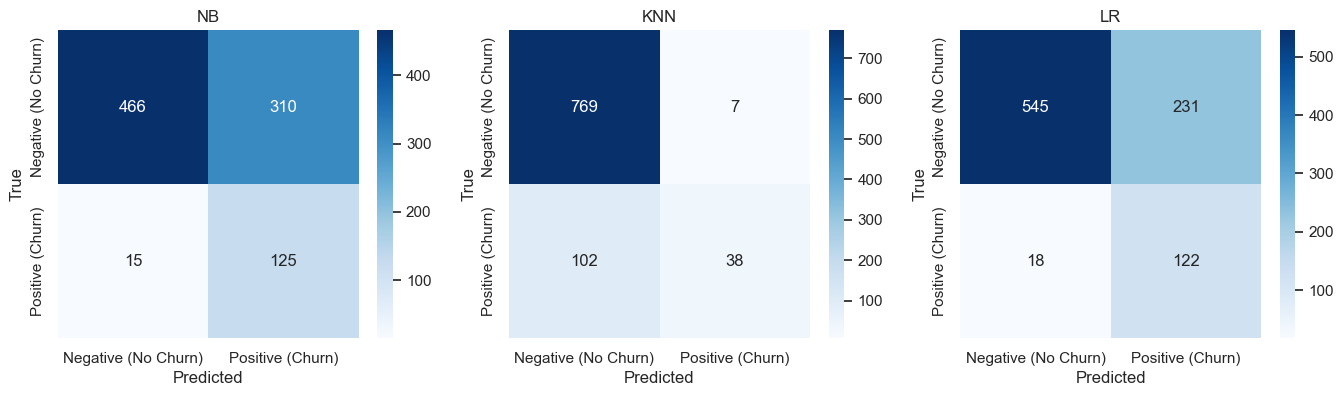

Accuracy    Recall  Precision  Specificity  F1 score
NB   0.645197  0.892857   0.287356     0.600515  0.434783
KNN  0.881004  0.271429   0.844444     0.990979  0.410811
LR   0.728166  0.871429   0.345609     0.702320  0.494929

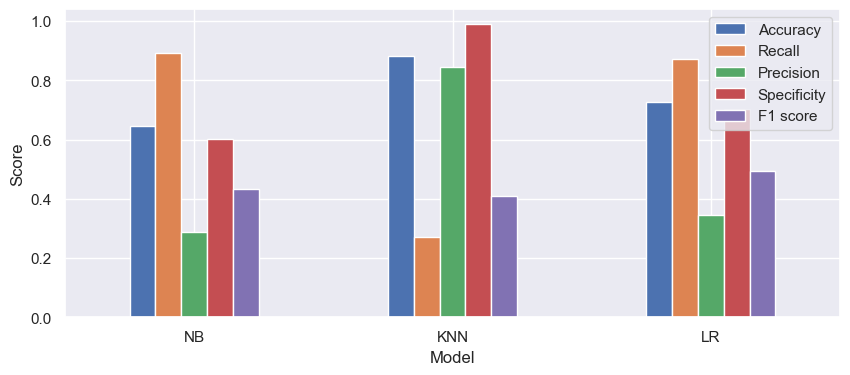

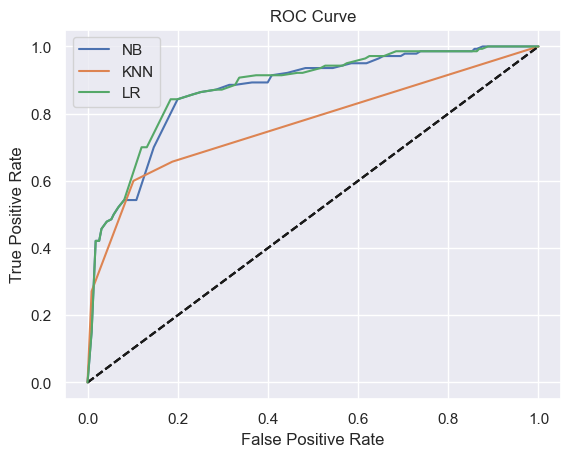

AUC
NB   0.868847
KNN  0.768603
LR   0.877471

In [78]:
compare_all_metrics(y_test, model_pred_dict, precision_score)

Recordemos que:

True positive (TP): cliente se da de baja de la plataforma

True negative (FP): cliente permanece en la plataforma

Utilizamos la matriz de confusion y Recall y precision para la interpretación de los modelos:

KNN detecta el mayor numero de casos para la clase que no nos interesa "cliente permanece en la plataforma" y muy pocos casos de la clase "se da de baja". A su vez, incluye en los false negative un valor mucho más alto que los TP detectados. 
Es por ello, que el valor de recall es muy bajo y el valor de precisión muy alto. 
El modelo no logró detectar la clase que nos interesa. Sin embargo, en notable del modelo que aunque predijo pocos casos verdaderos positivos lo hizo muy bien ya que la predicción de falsos positivos fue muy baja, por ello vemos que el valor de especificidad es el más alto de los modelos evaluados.  

NB y LR, comparados con KNN, presentan alto recall y baja precision; el modelo está detectando bien a los clientes que realmente se dan de baja pero también está incluyendo muestras de la clase false. 

De ambos modelos, aunque son similares en rendimiento (alto AUC), el que mejor clasifica nuestros datos es LR; obtuvo una predicción de los True Positive ligeramente menor que NB, pero incluyó un numero menor de casos predichos como False Positive que NB, lo que hace que al aplicar tecnicas de recuperacion en los clientes, la empressa no pierda el tiempo con clientes que realmente no se van a dar de baja.

Comparando la Curva Roc de los modelos y los valores de AUC, vemos que KNN presenta la menor area bajo la curva siendo su AUC menor en comparacion con NB y LR. KNN es el modelo con menor rendimiento de clasificación. 

### Análisis de umbrales

Tratemos de mejorar la precisión de los modelos cambiando el umbral de clasificación.

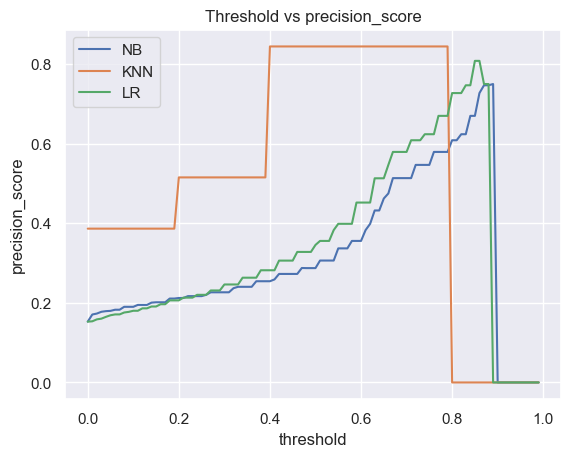

In [79]:
compare_metric_thresholds(y_test, model_pred_dict, precision_score)

In [80]:
best_thresholds = find_best_threshold(y_test, model_pred_dict, precision_score)

Model: NB
Best threshold: 0.63
Best precision_score: 0.8842382927831188
Model: KNN
Best threshold: 0.4
Best precision_score: 0.8770167748203335
Model: LR
Best threshold: 0.85
Best precision_score: 0.8892886543137943


### Modificamos el umbral de decisión

In [81]:
model_pred_dict_best_threshold = {}

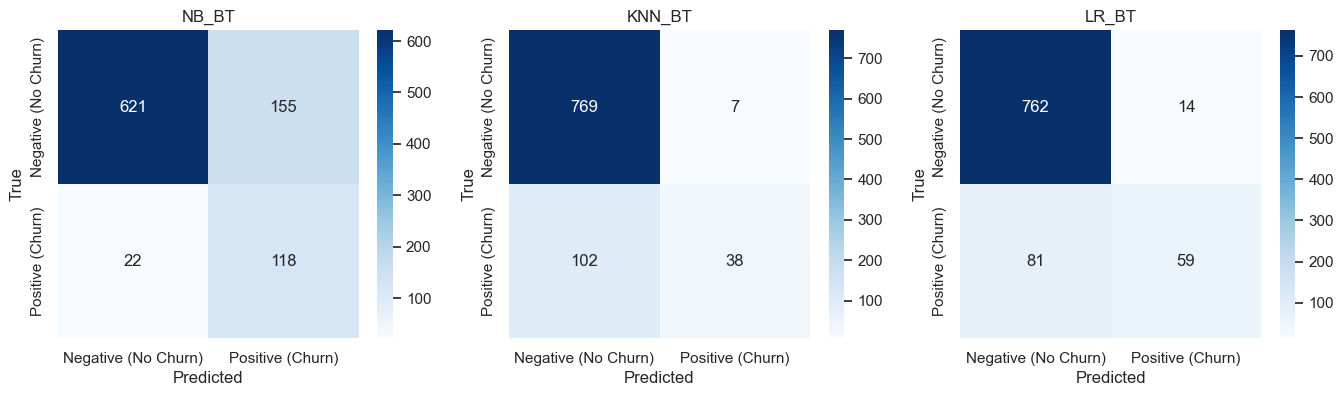

Accuracy    Recall  Precision  Specificity  F1 score
NB_BT   0.806769  0.842857   0.432234     0.800258  0.571429
KNN_BT  0.881004  0.271429   0.844444     0.990979  0.410811
LR_BT   0.896288  0.421429   0.808219     0.981959  0.553991

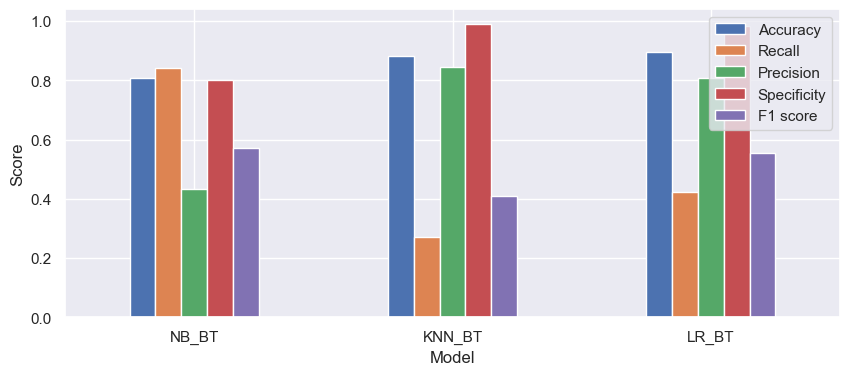

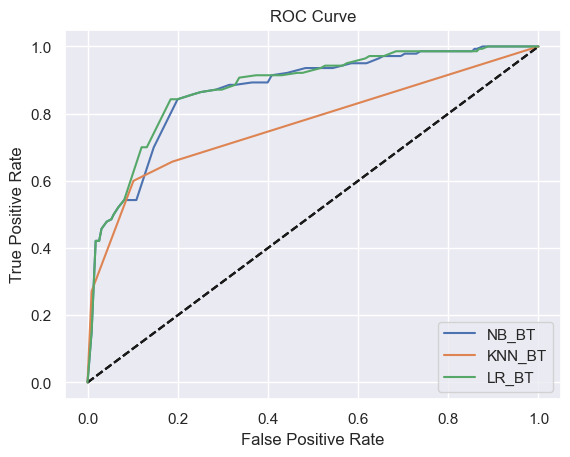

AUC
NB_BT   0.868847
KNN_BT  0.768603
LR_BT   0.877471

In [82]:
# modificamos el umbral para mejorar la precisión

y_pred_nb_bt = binarize(y_pred_proba_nb, threshold=best_thresholds['NB'])[:,1]

add_to_model_pred_dict('NB_BT', y_pred_nb_bt, y_pred_proba_nb, model_pred_dict_best_threshold)

y_pred_knn_bt = binarize(y_pred_proba_knn, threshold=best_thresholds['KNN'])[:,1]

add_to_model_pred_dict('KNN_BT', y_pred_knn_bt, y_pred_proba_knn, model_pred_dict_best_threshold)

y_pred_lr_bt = binarize(y_pred_proba_lr, threshold=best_thresholds['LR'])[:,1]

add_to_model_pred_dict('LR_BT', y_pred_lr_bt, y_pred_proba_lr, model_pred_dict_best_threshold)

compare_all_metrics(y_test, model_pred_dict_best_threshold, precision_score)




Recordemos que:

True positive (TP): cliente se da de baja de la plataforma

True negative (FP): cliente permanece en la plataforma

Al modificar el umbral de decision, con la finalidad de identificar correctamente la clase de interes y pensando en nuestro objetivo que es predecir el mayor numero de casos donde el cliente esté propenso a darse de baja, obtuvimos un cambio notable que nos ayuda en decidir qué modelo es el que mejor clasifica nuestros datos:

LR se suma a KNN en predecir correctamente a los clietes que se dan de baja, valores altos de precision y bajos de recall, pero detectando muy pocos casos y dejando ir un alto numero de clientes como falsos negativos. Lo cual es contrario a nuestro objetivo.

por lo cual, NB es nuestro mejor modelo: mantiene un alto valor de recall; detecta un numero importante de clientes que podrian darse de baja, disminuye la fuga de casos de clientes que podrian abanadonar la plataforma (FP) y mejora la metrica de precision al disminuir la cantidad de predicciones false positive.